# Analysis of Employee Exit Surveys - Data Cleaning Exercise

This project focus on cleaning and analysing exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) body of the Queensland government in Australia. The DETE exit survey can be found hear, meanwhile, the original dataset for the TAFE exit survey is no longer available. 

## Objective
The objective of this analysis is to combine the results for both surveys to answer the following questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The stakeholders want us to combine results from both surveys and answer above questions. Although both surveys used the same template, one of them had customized answers.

## Summary Of Findings

Employees with more years of service tend to have higher likelihoods of resigning due to dissatisfaction in comparison to other employees that have a shorter tenure with the company.

In [107]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [108]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [109]:
dete_survey.isnull().sum().sort_values()

ID                                       0
Workload                                 0
Work life balance                        0
Traumatic incident                       0
Ill Health                               0
Study/Travel                             0
Relocation                               0
Maternity/family                         0
Employment conditions                    0
Work location                            0
Lack of job security                     0
Lack of recognition                      0
Physical work environment                0
Dissatisfaction with the department      0
None of the above                        0
Interpersonal conflicts                  0
Job dissatisfaction                      0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Career move to public sector             0
Career move to private sector            0
Region     

In [110]:
dete_survey.head(10)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972,2007,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988,1990,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,Not Stated,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [111]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [112]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

The following observations be made from the above analysis.

* The dete_survey dataframe contains `Not Stated` values that indicate values are missing, but they aren't represented as `NaN`.
* Both the `dete_survey` and `tafe_survey` contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied
* Both dataframes contain null values
* dete_survey have 822 rows with 56 columns, while tafe_survey have 702 rows with 72 colums

## Identify Missing Values and Drop Unneccessary Columns

First, we'll correct the `Not Stated` values and drop some of the columns we don't need for our analysis.

In [113]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Now, let's drop some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with.

In [114]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In order to avoid working with columns that are needed, we dropped `[28:48]` columns from dete_survey data, we also dropped `[17:66]` columns from tafe_survey data.

## Rename Columns

We will rename the column names to make them suitable for our analysis

In [115]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [116]:
tafe_survey_updated.rename({'Record ID': 'id',
                            'CESSATION YEAR': 'cease_date',
                            'Reason for ceasing employment': 'separationtype',
                            'Gender. What is your Gender?': 'gender',
                            'CurrentAge. Current Age': 'age',
                            'Employment Type. Employment Type': 'employment_status',
                            'Classification. Classification': 'position',
                            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},
                           axis=1,inplace=True)

## Data Filtering

Since our focus is on employees who resigned, we'll only analyze survey respondents who resigned, so we'll only select separation types containing the string 'Resignation.

In [117]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [118]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

In [119]:
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [120]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

It can be observed that both datasets have varying seperation types, hence we have to account for this variations so that we don’t unintentionally drop important data.

In [121]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation' ].copy()

In [122]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In each of dataframes, we select only the data for survey respondents who have a Resignation separation type.

## Verify the Year Column

The nest step is for us to clean and explore the cease_date and dete_start_date columns to make sure all of the years are in order. We'll use the following criteria:

* Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't be practical to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

In [123]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

It could be observed from the data above that the year formats are not uniform, some are `YYYY`, while some are `MM/YYYY` format. We will go ahead and consolidate this this data into a uniform date format.

In [124]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype(float)

In [125]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [126]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [127]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

We can deduce from above that the years in both dataframes don't completely align. The `tafe_survey_updated` dataframe contains some cease dates in `2009`, but the `dete_survey_updated` dataframe does not. The `tafe_survey_updated` dataframe also contains `68` cease dates in `2010`, while the `dete_survey_updaed` contains only `2`.
Since we aren't concerned with analyzing the results by year, we'll leave them as is but nonetheless it is worth noting.

## Create a New Column

Since our end goal is to answer the question below, we need a column containing the length of time an employee spent in their workplace, or years of service, in both dataframes.

**End goal**: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer? The `tafe_resignation` dataframe already contains a "`service`" column, which we renamed to `institute_service`.

Next step, we calculate the years of service in the `dete_survey_updated` dataframe by subtracting the `dete_start_date` from the `cease_date` and create a new column named `institute_service`.

In [128]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [129]:
dete_resignations.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


## Identify Dissatisfied Employees

Next, we'll identify employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

**tafe_survey_updated**:<br>
* `Contributing Factors. Dissatisfaction`<br>
* `Contributing Factors. Job Dissatisfaction`<br>

**dafe_survey_updated**:<br>
* `job_dissatisfaction`<br>
* `dissatisfaction_with_the_department`<br>
* `physical_work_environment`<br>
* `lack_of_recognition`<br>
* `lack_of_job_security`<br>
* `work_location`<br>
* `employment_conditions`<br>
* `work_life_balance`<br>
* `workload`

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new `dissatisfied` column will contain just the following values:

**`True`**: indicates a person resigned because they were dissatisfied in some way<br>
**`False`**: indicates a person resigned because of a reason other than dissatisfaction with the job<br>
**`NaN`**: indicates the value is missing

In [130]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [131]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [132]:
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element == '-':
        return False
    else:
        return True

In [133]:
tafe_diss_columns = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']

In [134]:
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_diss_columns].applymap(update_vals).any(axis=1,skipna=False)
tafe_resignations_up = tafe_resignations.copy()

In [135]:
tafe_resignations_up['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

In [136]:
dete_diss_columns = ['dissatisfaction_with_the_department',
                     'physical_work_environment',
                     'lack_of_recognition',
                     'lack_of_job_security',
                     'work_location',
                     'employment_conditions',
                     'work_life_balance',
                     'workload']

In [137]:
dete_resignations['dissatisfied'] = dete_resignations[dete_diss_columns].any(axis=1,skipna=False)
dete_resignations_up = dete_resignations.copy()

In [138]:
dete_resignations['dissatisfied'].value_counts()

False    169
True     142
Name: dissatisfied, dtype: int64

It appears DETE has 149 True results for dissatisfaction while TAFE has 91. 

## Combining the Data

Below, we'll add an institute column so that we can differentiate the data from each survey after we combine them. Then, we'll combine the dataframes and drop any remaining columns we don't need.

In [139]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [140]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)

In [141]:
combined.notnull().sum().sort_values(ascending=False)

id                                                     651
institute                                              651
separationtype                                         651
dissatisfied                                           643
cease_date                                             635
position                                               598
employment_status                                      597
age                                                    596
gender                                                 592
institute_service                                      563
WorkArea                                               340
Institute                                              340
Contributing Factors. Study                            332
Contributing Factors. NONE                             332
Contributing Factors. Interpersonal Conflict           332
Contributing Factors. Other                            332
Contributing Factors. Dissatisfaction                  3

In [142]:
combined_updated = combined.dropna(thresh=500,axis=1).copy()

In [143]:
combined_updated.notnull().sum().sort_values(ascending=False)

institute            651
separationtype       651
id                   651
dissatisfied         643
cease_date           635
position             598
employment_status    597
age                  596
gender               592
institute_service    563
dtype: int64

In [144]:
combined_updated.isnull().sum().sort_values()

id                    0
separationtype        0
institute             0
dissatisfied          8
cease_date           16
position             53
employment_status    54
age                  55
gender               59
institute_service    88
dtype: int64

## Clean the Service Column

Next, we'll clean the `institute_service` column and categorize employees according to the following definitions:

`New`: Less than 3 years in the workplace<br>
`Experienced`: 3-6 years in the workplace<br>
`Established`: 7-10 years in the workplace<br>
`Veteran`: 11 or more years in the workplace 

Our analysis is based an article, which agreed with the popular saying that age is just a number, the article went further to make the argument that understanding employee's needs according to career stage instead of age is more effective at improving or maintaining employee employee moral.

In [145]:
combined_updated['institute_service'].value_counts(dropna=False).reset_index()

,index,institute_service
0,NaN,88
1,Less than 1 year,73
2,1-2,64
3,3-4,63
4,5-6,33
5,11-20,26
6,5,23
7,1,22
8,7-10,21
9,0,20


In [146]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [147]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype(str).str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype(float)

In [158]:
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

We noticed that a majority of the employess have been with the firm for less than 10 years, while a few employees have been with the firm for longer than 20 years.

Now, we'll extract the years of service from each value in the `institute_service` column.

In [149]:
def experience(element):
    if element < 3:
        return 'New'
    elif 3 <= element <= 6:
        return 'Experienced'
    elif 7 <= element <= 10:
        return 'Established'
    elif pd.isnull(element):
        return np.nan
    else:
        return 'Veteran'

In [150]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(experience)

In [151]:
combined_updated['service_cat'].value_counts().reset_index()

,index,service_cat
0,New,193
1,Experienced,172
2,Veteran,136
3,Established,62


Finally, we'll replace the missing values in the `dissatisfied` column with the most frequent value, False. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each `service_cat` group and plot the results.

In [152]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    410
True     233
NaN        8
Name: dissatisfied, dtype: int64

In [153]:
combined_updated['dissatisfied'].fillna(False,inplace=True)

In [154]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    418
True     233
Name: dissatisfied, dtype: int64

In [155]:
dissatisfied_pt = combined_updated.pivot_table(index='service_cat',values='dissatisfied',aggfunc=['mean'])
dissatisfied_pt

,mean
,dissatisfied
service_cat,
Established,0.500000
Experienced,0.325581
New,0.290155
Veteran,0.470588


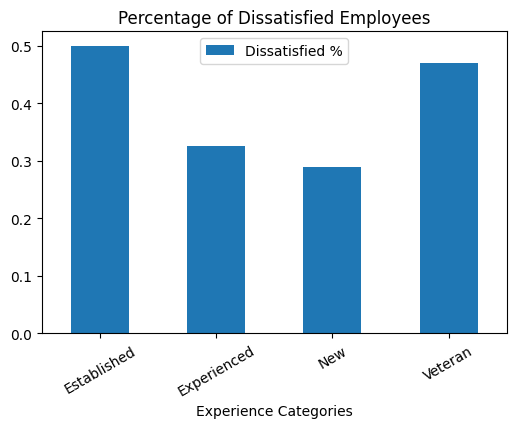

In [156]:
dissatisfied_pt.plot(kind='bar',title='Percentage of Dissatisfied Employees',rot=30)
plt.xlabel('Experience Categories')
plt.legend(['Dissatisfied %'])

plt.show()

## Conclusion

Generally, the results of our analysis shows that employees with at least 7 years of service are likely to resign due to dissatisfaction, while employees with less than 7 years of service are not likely to resign.

Going by the service categories, employees in `Established` and `Veteran` categories have a higher likelihood to resign.

NOTE: Other factors that could be considered for employees resignation are `Age`, `Role`, `Contract type` among others.